In [66]:
import pandas as pd
import geopandas as gpd
import pysal as ps
import libpysal
from libpysal.weights import Queen, Rook, KNN
import seaborn as sns
import spreg
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error as mse

In [2]:
shapefile = gpd.read_file("shapefiles/cleaned.shp")

<AxesSubplot:>

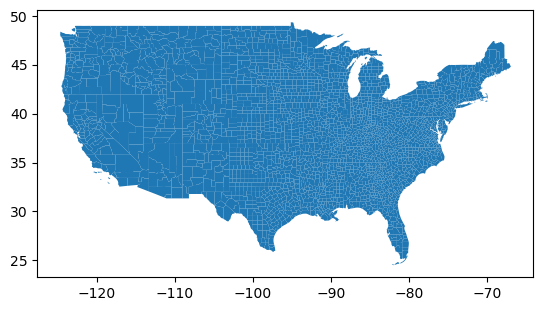

In [3]:
shapefile.plot()

In [4]:
income = pd.read_csv("data/income.csv")

In [5]:
housing = pd.read_csv("data/housing.csv")

In [6]:
housing = housing.drop(columns=["Value"])

In [7]:
housing

,StateFIPS,State,CountyFIPS,County,Year,Data Comment,BRIC Level,Resilience Score,Unnamed: 9,Resilience Score.1
0,1,Alabama,1001,Autauga,2020,NaN,Medium (3),0.224,NaN,State-Normed
1,1,Alabama,1003,Baldwin,2020,NaN,High (5),0.286,NaN,State-Normed
2,1,Alabama,1005,Barbour,2020,NaN,Medium Low (2),0.160,NaN,State-Normed
3,1,Alabama,1007,Bibb,2020,NaN,Medium Low (2),0.179,NaN,State-Normed
4,1,Alabama,1009,Blount,2020,NaN,Medium (3),0.193,NaN,State-Normed
...,...,...,...,...,...,...,...,...,...,...
3145,56,Wyoming,56037,Sweetwater,2020,NaN,Medium (3),0.256,NaN,State-Normed
3146,56,Wyoming,56039,Teton,2020,NaN,Medium High (4),0.284,NaN,State-Normed
3147,56,Wyoming,56041,Uinta,2020,NaN,Low (1),0.221,NaN,State-Normed
3148,56,Wyoming,56043,Washakie,2020,NaN,High (5),0.312,NaN,State-Normed


In [8]:
housing["Resilience Score"] = housing["Resilience Score"].replace({"State-Normed": "0"}, regex=True).astype(float)

In [9]:
shapefile.GEOID = shapefile.GEOID.apply(int)

In [10]:
merged_data = shapefile.merge(income, left_on="GEOID", right_on="CountyFIPS")

In [11]:
merged_data = merged_data.merge(housing, left_on="CountyFIPS", right_on="CountyFIPS")

In [12]:
merged_data.Value = merged_data.Value.replace({",": ""}, regex = True).astype(float)

In [13]:
merged_data.boundary

0       LINESTRING (-78.90200 34.83527, -78.79960 34.8...
1       LINESTRING (-80.49737 35.20210, -80.29542 35.5...
2       LINESTRING (-81.68699 41.13596, -81.68495 41.2...
3       LINESTRING (-76.81373 41.59003, -76.22014 41.5...
4       LINESTRING (-95.15274 32.66095, -95.15211 32.9...
                              ...                        
3102    LINESTRING (-93.13029 30.59789, -92.97917 30.5...
3103    LINESTRING (-99.84661 48.37130, -99.49292 48.3...
3104    LINESTRING (-97.36812 41.04695, -96.91094 41.0...
3105    LINESTRING (-81.90665 35.88338, -81.94319 35.9...
3106    LINESTRING (-84.43301 32.04196, -84.43121 32.1...
Length: 3107, dtype: geometry

In [14]:
merged_data.centroid

/home/aby/.conda/envs/esra/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


0       POINT (-78.56180 34.61296)
1       POINT (-80.25094 35.31648)
2       POINT (-81.53123 41.12465)
3       POINT (-76.51247 41.44635)
4       POINT (-94.93857 32.73936)
                   ...            
3102    POINT (-92.82445 30.65381)
3103    POINT (-99.35918 48.06840)
3104    POINT (-97.13967 40.87242)
3105    POINT (-81.70756 35.74990)
3106    POINT (-84.19793 32.03634)
Length: 3107, dtype: geometry

In [15]:
merged_data.geometry

0       POLYGON ((-78.90200 34.83527, -78.79960 34.850...
1       POLYGON ((-80.49737 35.20210, -80.29542 35.502...
2       POLYGON ((-81.68699 41.13596, -81.68495 41.277...
3       POLYGON ((-76.81373 41.59003, -76.22014 41.541...
4       POLYGON ((-95.15274 32.66095, -95.15211 32.902...
                              ...                        
3102    POLYGON ((-93.13029 30.59789, -92.97917 30.598...
3103    POLYGON ((-99.84661 48.37130, -99.49292 48.370...
3104    POLYGON ((-97.36812 41.04695, -96.91094 41.046...
3105    POLYGON ((-81.90665 35.88338, -81.94319 35.960...
3106    POLYGON ((-84.43301 32.04196, -84.43121 32.134...
Name: geometry, Length: 3107, dtype: geometry

In [16]:
merged_data.geometry.area

/home/aby/.conda/envs/esra/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


0       0.223971
1       0.104023
2       0.117675
3       0.126334
4       0.146995
          ...   
3102    0.188884
3103    0.443666
3104    0.159221
3105    0.132195
3106    0.119515
Length: 3107, dtype: float64

<AxesSubplot:>

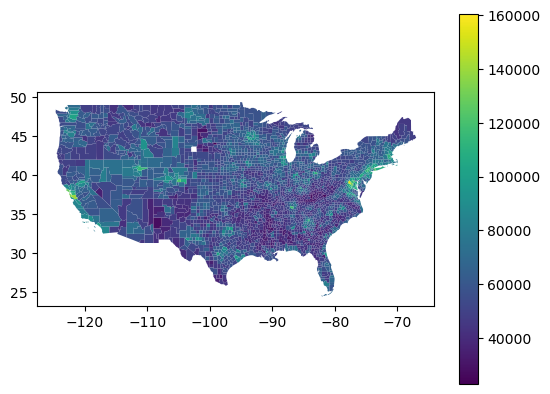

In [17]:
merged_data.plot(column='Value', legend=True)

<AxesSubplot:>

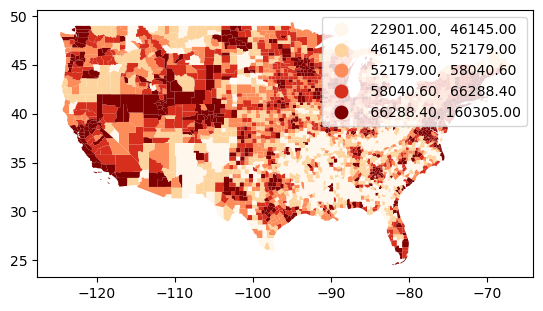

In [18]:
merged_data.plot(column='Value', cmap='OrRd', scheme='quantiles', legend=True)

In [19]:
w_knn1 = KNN.from_shapefile('shapefiles/cleaned.shp')

/home/aby/.conda/envs/esra/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


In [20]:
w_knn1.neighbors

{0: [1220, 2260],
 1: [1417, 374],
 2: [1126, 3033],
 3: [173, 2649],
 4: [639, 1274],
 5: [2928, 360],
 6: [558, 2581],
 7: [1913, 1109],
 8: [992, 2088],
 9: [1396, 2041],
 10: [1138, 505],
 11: [2504, 1634],
 12: [441, 2570],
 13: [359, 2920],
 14: [1177, 2563],
 15: [3097, 2451],
 16: [477, 529],
 17: [2197, 287],
 18: [1598, 1605],
 19: [185, 1498],
 20: [396, 2276],
 21: [2170, 2261],
 22: [93, 2566],
 23: [1756, 211],
 24: [1001, 2263],
 25: [2815, 796],
 26: [2544, 1548],
 27: [3079, 1890],
 28: [36, 2102],
 29: [1042, 802],
 30: [2174, 2806],
 31: [1749, 1743],
 32: [1785, 2094],
 33: [2960, 2593],
 34: [1075, 258],
 35: [674, 959],
 36: [28, 1625],
 37: [50, 1607],
 38: [1436, 1096],
 39: [2895, 2659],
 40: [408, 41],
 41: [791, 3104],
 42: [870, 1800],
 43: [425, 1224],
 44: [1628, 187],
 45: [1634, 2027],
 46: [882, 420],
 47: [946, 170],
 48: [1340, 970],
 49: [2660, 1227],
 50: [37, 1777],
 51: [1922, 1391],
 52: [1184, 1023],
 53: [936, 995],
 54: [2415, 2434],
 55: [723

In [21]:
w_knn3 = KNN.from_shapefile('shapefiles/cleaned.shp', 3)

In [22]:
w_knn3.neighbors

{0: [1220, 2260, 2512],
 1: [1417, 374, 72],
 2: [1126, 3033, 1929],
 3: [173, 2649, 1761],
 4: [639, 1274, 1403],
 5: [2928, 360, 1136],
 6: [558, 2581, 339],
 7: [1913, 1109, 2262],
 8: [992, 2088, 1057],
 9: [1396, 2041, 2235],
 10: [1138, 505, 1937],
 11: [2504, 1634, 781],
 12: [441, 2570, 694],
 13: [359, 2920, 821],
 14: [1177, 2563, 2561],
 15: [3097, 2451, 201],
 16: [477, 529, 2621],
 17: [2197, 287, 1435],
 18: [1598, 1605, 377],
 19: [185, 1498, 489],
 20: [396, 2276, 2429],
 21: [2170, 2261, 387],
 22: [93, 2566, 1001],
 23: [1756, 211, 166],
 24: [1001, 2263, 1408],
 25: [2815, 796, 2354],
 26: [2544, 1548, 2178],
 27: [3079, 1890, 1212],
 28: [36, 2102, 1491],
 29: [1042, 802, 1411],
 30: [2174, 2806, 1814],
 31: [1749, 1743, 533],
 32: [1785, 2094, 1316],
 33: [2960, 2593, 2811],
 34: [1075, 258, 2388],
 35: [674, 959, 1333],
 36: [28, 1625, 969],
 37: [50, 1607, 371],
 38: [1436, 1096, 2215],
 39: [2895, 2659, 459],
 40: [408, 41, 1581],
 41: [791, 3104, 408],
 42: [87

In [23]:
w_queen = Queen.from_shapefile('shapefiles/cleaned.shp')

/home/aby/.conda/envs/esra/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
 There are 2 islands with ids: 2443, 2703.
  warnings.warn(message)


In [24]:
w_queen.neighbors

{0: [2512, 2260, 1573, 1220, 840],
 1: [2288, 225, 2628, 374, 278, 72, 1417],
 2: [416, 1126, 1929, 1706, 3033, 142],
 3: [2119, 1353, 2649, 173, 1694],
 4: [1403, 2341, 1110, 1274, 1867, 3022, 639],
 5: [2928, 1136, 1410, 2435, 2097, 2354, 360],
 6: [2225, 339, 2581, 1836, 558],
 7: [81, 2517, 2262, 1109, 1913, 1661],
 8: [992, 1057, 2088, 1995, 1619, 1620, 1428, 2332],
 9: [1396, 1397, 390, 2457, 1050, 2235, 2041],
 10: [1937, 1138, 505],
 11: [1634, 1682, 598, 2504, 781, 1259, 525],
 12: [2707, 2373, 694, 441, 2570, 140, 2495],
 13: [544, 208, 1009, 821, 966, 359, 2920],
 14: [2561, 2994, 2563, 1810, 1080, 1177],
 15: [81, 2451, 2262, 606, 201, 3097],
 16: [2721, 529, 2621, 1176, 2859, 477],
 17: [1435, 2197, 287],
 18: [377, 1605, 1598],
 19: [2195, 708, 2132, 118, 185, 489, 1498],
 20: [3058, 2276, 2581, 396, 2429, 2108],
 21: [1793, 387, 2261, 2170, 988],
 22: [2566, 2263, 24, 1001, 314, 794, 93],
 23: [211, 292, 166, 459, 1756],
 24: [1408, 3029, 22, 2263, 1001, 812, 399],
 25: 

In [25]:
w_rook = Rook.from_shapefile('shapefiles/cleaned.shp')

In [26]:
w_rook.neighbors

{0: [2512, 1220, 2260, 1573, 840],
 1: [2288, 374, 278, 72, 1417],
 2: [1126, 1929, 1706, 3033, 142],
 3: [2119, 1353, 2649, 173, 1694],
 4: [1403, 2341, 1110, 1274, 1867, 3022, 639],
 5: [1136, 2097, 1410, 2435, 2354, 2928, 360],
 6: [2225, 339, 2581, 1836, 558],
 7: [81, 2517, 2262, 1109, 1913, 1661],
 8: [992, 1057, 1619, 1428, 1620, 2088, 1995],
 9: [1396, 390, 2457, 1050, 2235, 2041],
 10: [1937, 1138, 505],
 11: [1682, 1634, 598, 2504, 1259, 781],
 12: [2707, 2373, 694, 441, 2570],
 13: [208, 1009, 821, 966, 359, 2920],
 14: [2561, 2994, 2563, 1810, 1080, 1177],
 15: [81, 2451, 2262, 201, 3097, 606],
 16: [477, 529, 2721, 1176, 2859, 2621],
 17: [1435, 2197, 287],
 18: [377, 1605, 1598],
 19: [2195, 708, 2132, 185, 1498, 489],
 20: [3058, 2276, 2581, 396, 2429, 2108],
 21: [1793, 387, 2261, 2170, 988],
 22: [2566, 2263, 1001, 314, 93],
 23: [1756, 211, 292, 166],
 24: [1408, 3029, 2263, 1001, 812, 399],
 25: [2928, 2354, 932, 796, 2815],
 26: [305, 2178, 347, 1548, 1101],
 27: [1

In [27]:
wq = libpysal.weights.Queen.from_dataframe(merged_data)

/home/aby/.conda/envs/esra/lib/python3.7/site-packages/libpysal/weights/_contW_lists.py:31: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return list(it.chain(*(_get_boundary_points(part.boundary) for part in shape)))
/home/aby/.conda/envs/esra/lib/python3.7/site-packages/libpysal/weights/_contW_lists.py:29: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return list(it.chain(*(list(zip(*shape.coords.xy)) for shape in shape)))
/home/aby/.conda/envs/esra/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
 There are 2 islands with ids: 2442, 2702.
  warnings.warn(message)


In [28]:
wq.transform = 'r'

('WARNING: ', 2442, ' is an island (no neighbors)')
('WARNING: ', 2702, ' is an island (no neighbors)')


In [29]:
merged_data['Value_splag'] = libpysal.weights.lag_spatial(wq, merged_data['Value'])

In [30]:
merged_data['ResilienceS_splag'] = libpysal.weights.lag_spatial(wq, merged_data['Resilience Score'])

In [31]:
merged_data['Value_splag'],merged_data['Value']

(0       46842.000000
 1       59113.714286
 2       68077.333333
 3       56060.000000
 4       51355.571429
             ...     
 3102    48060.200000
 3103    55073.333333
 3104    62471.833333
 3105    50082.714286
 3106    47173.625000
 Name: Value_splag, Length: 3107, dtype: float64,
 0       43664.0
 1       53769.0
 2       60715.0
 3       52821.0
 4       58231.0
          ...   
 3102    49671.0
 3103    51189.0
 3104    72456.0
 3105    48729.0
 3106    42653.0
 Name: Value, Length: 3107, dtype: float64)

In [32]:
merged_data['Value'].corr(merged_data['Value_splag'])

0.7614864026924522

<AxesSubplot:>

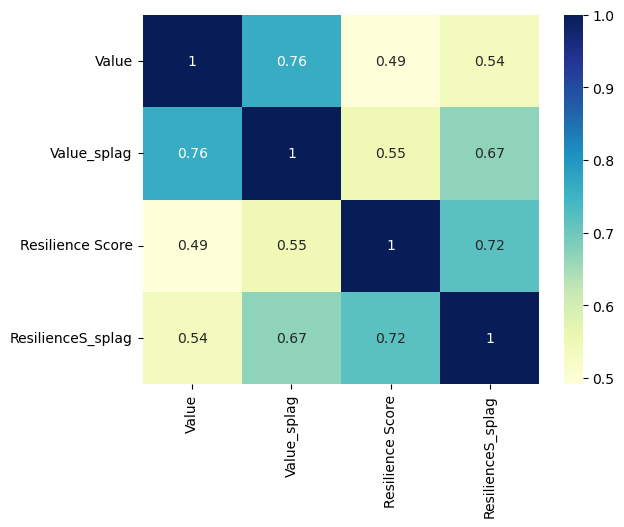

In [33]:
sns.heatmap(merged_data[['Value', 'Value_splag', 'Resilience Score', 'ResilienceS_splag']].corr(), cmap="YlGnBu", annot=True)

In [41]:
y = merged_data['Resilience Score'].values

In [42]:
y

array([0.173, 0.249, 0.327, ..., 0.272, 0.201, 0.219])

In [43]:
x_OLS = merged_data[['Value']].values

In [44]:
x_OLS

array([[43664.],
       [53769.],
       [60715.],
       ...,
       [72456.],
       [48729.],
       [42653.]])

In [45]:
wq = libpysal.weights.Queen.from_dataframe(merged_data)

/home/aby/.conda/envs/esra/lib/python3.7/site-packages/libpysal/weights/_contW_lists.py:31: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return list(it.chain(*(_get_boundary_points(part.boundary) for part in shape)))
/home/aby/.conda/envs/esra/lib/python3.7/site-packages/libpysal/weights/_contW_lists.py:29: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return list(it.chain(*(list(zip(*shape.coords.xy)) for shape in shape)))
/home/aby/.conda/envs/esra/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
 There are 2 islands with ids: 2442, 2702.
  warnings.warn(message)


In [46]:
wq.transform = 'r'

('WARNING: ', 2442, ' is an island (no neighbors)')
('WARNING: ', 2702, ' is an island (no neighbors)')


In [58]:
model_OLS = spreg.OLS(
    y,
    x_OLS,
    w=wq,
    spat_diag=True,
    name_x=['Income'], 
    name_y='Housing Resillience'
)

print(model_OLS.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :Housing Resillience                Number of Observations:        3107
Mean dependent var  :      0.2492                Number of Variables   :           2
S.D. dependent var  :      0.0500                Degrees of Freedom    :        3105
R-squared           :      0.2412
Adjusted R-squared  :      0.2409
Sum squared residual:       5.884                F-statistic           :    986.9525
Sigma-square        :       0.002                Prob(F-statistic)     :  2.332e-188
S.E. of regression  :       0.044                Log likelihood        :    5330.393
Sigma-square ML     :       0.002                Akaike info criterion :  -10656.787
S.E of regression ML:      0.0435                Schwarz criterion     :  -10644.704

----------------------------------------------------------------------

In [55]:
x_splag_X = merged_data[['Value', 'Value_splag']].values

In [57]:
model_splag_of_X = spreg.OLS(
    y,
    x_splag_X,
    w=wq,
    spat_diag=True,
    name_x=['Value', 'Value_splag'], 
    name_y='Housing Resillience'
)

print(model_splag_of_X.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :Housing Resillience                Number of Observations:        3107
Mean dependent var  :      0.2492                Number of Variables   :           3
S.D. dependent var  :      0.0500                Degrees of Freedom    :        3104
R-squared           :      0.3143
Adjusted R-squared  :      0.3138
Sum squared residual:       5.318                F-statistic           :    711.2676
Sigma-square        :       0.002                Prob(F-statistic)     :  5.174e-255
S.E. of regression  :       0.041                Log likelihood        :    5487.696
Sigma-square ML     :       0.002                Akaike info criterion :  -10969.391
S.E of regression ML:      0.0414                Schwarz criterion     :  -10951.267

----------------------------------------------------------------------

In [60]:
x_splag_X1 = sm.add_constant(x_splag_X)
model = sm.OLS(y, x_splag_X1)
model_result = model.fit()
model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     711.3
Date:                Thu, 09 Jan 2025   Prob (F-statistic):          5.17e-255
Time:                        23:22:45   Log-Likelihood:                 5487.7
No. Observations:                3107   AIC:                        -1.097e+04
Df Residuals:                    3104   BIC:                        -1.095e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1111      0.004     29.376      0.000       0.104       0.118
x1          5.986e-07   7.91e-08      7.568      0.000    4.44e-07    7.54e-07
x2          1.814e-06   9.97e-08     18.187      0.000    1.62e-06    2.01e-06
==============================================================================
Omnibus:                       62.110   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.569
Skew:                           0.136   Prob(JB):                     3.60e-25
Kurtosis:                       3.892   Cond. No.                     4.22e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
x_splag_Y = merged_data[['Value', 'ResilienceS_splag']].values

In [63]:
model_splag_of_Y = spreg.OLS(
    y,
    x_splag_Y,
    w=wq,
    spat_diag=True,
    name_x=['Value', 'ResilienceS_splag'], 
    name_y='Housing Resillience'
)

print(model_splag_of_Y.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :Housing Resillience                Number of Observations:        3107
Mean dependent var  :      0.2492                Number of Variables   :           3
S.D. dependent var  :      0.0500                Degrees of Freedom    :        3104
R-squared           :      0.5311
Adjusted R-squared  :      0.5308
Sum squared residual:       3.636                F-statistic           :   1757.8815
Sigma-square        :       0.001                Prob(F-statistic)     :           0
S.E. of regression  :       0.034                Log likelihood        :    6078.185
Sigma-square ML     :       0.001                Akaike info criterion :  -12150.371
S.E of regression ML:      0.0342                Schwarz criterion     :  -12132.246

----------------------------------------------------------------------

In [64]:
x_splags = merged_data[['Value','Value_splag', 'ResilienceS_splag']].values

In [65]:
model_splags_both = spreg.OLS(
    y,
    x_splags,
    w=wq,
    spat_diag=True,
    name_x=['Value', 'Value_splag', 'ResilienceS_splag'], 
    name_y='Housing Resillience'
)

print(model_splag_of_Y.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :Housing Resillience                Number of Observations:        3107
Mean dependent var  :      0.2492                Number of Variables   :           3
S.D. dependent var  :      0.0500                Degrees of Freedom    :        3104
R-squared           :      0.5311
Adjusted R-squared  :      0.5308
Sum squared residual:       3.636                F-statistic           :   1757.8815
Sigma-square        :       0.001                Prob(F-statistic)     :           0
S.E. of regression  :       0.034                Log likelihood        :    6078.185
Sigma-square ML     :       0.001                Akaike info criterion :  -12150.371
S.E of regression ML:      0.0342                Schwarz criterion     :  -12132.246

----------------------------------------------------------------------

In [67]:
mses = pd.Series({'OLS': mse(y, model_OLS.predy.flatten()),
                     'splag_of_X': mse(y, model_splag_of_X.predy.flatten()),
                     'splag_of_Y': mse(y, model_splag_of_Y.predy.flatten()),
                     'both_splags': mse(y, model_splags_both.predy.flatten())
                    })
mses.sort_values()

both_splags    0.001170
splag_of_X     0.001170
splag_of_Y     0.001170
OLS            0.001894
dtype: float64